In [33]:
import numpy as np
from scipy.misc import imread
import glob
from skimage import util 
from skimage import io as io
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# DEMO OF WIERD NOTATION
lst = np.array(list(range(5)))
print(lst, type(lst))

# A few different ways to add 3
print(lst + 3)  # works with numpy

# This doesn't work with normal list
try:
    print(list(lst) + 3)
except TypeError as e:
    print(type(e), e)

# For loop
print()
print('FOR LOOP')
add_three = []
for n in lst:
    print(n)
    add_three.append(n+3)
    print(add_three)


# MAGIC
print('ADVANCED TOPICS')
add_three = [n + 3 for n in lst]
print(add_three)

add_three = [print('INSIDE', n) for n in lst]
print(add_three)

add_three = [print('INSIDE', n) for n in lst if n == 3]
print(add_three)

[0 1 2 3 4] <class 'numpy.ndarray'>
[3 4 5 6 7]
<class 'TypeError'> can only concatenate list (not "int") to list

FOR LOOP
0
[3]
1
[3, 4]
2
[3, 4, 5]
3
[3, 4, 5, 6]
4
[3, 4, 5, 6, 7]
ADVANCED TOPICS
[3, 4, 5, 6, 7]
INSIDE 0
INSIDE 1
INSIDE 2
INSIDE 3
INSIDE 4
[None, None, None, None, None]
INSIDE 3
[None]


In [4]:
pwd

'/Users/kategroschner/Documents/particleRecognition'

In [5]:
os.getcwd()

'/Users/kategroschner/Documents/particleRecognition'

In [70]:
a = np.reshape(np.array(range(10)),(1,-1))
print(a)
print(a.shape)
b = np.append(a,a,axis=0)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
(1, 10)
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


In [78]:
try:
    path = "/Users/cgroschner/Box Sync/Research/Training Data/SegmentedImages_DotNoFringe"    
    path2 = "/Users/cgroschner/Box Sync/Research/Training Data/SegmentedImage_Nothing"

    name = "."
    length1 = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    length2 = len([name for name in os.listdir(path2) if os.path.isfile(os.path.join(path2, name))])
except:
    path = "/Users/kategroschner/Box Sync/Research/Training Data/SegmentedImages_DotNoFringe"    
    path2 = "/Users/kategroschner/Box Sync/Research/Training Data/SegmentedImage_Nothing"

    name = "."
    length1 = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    length2 = len([name for name in os.listdir(path2) if os.path.isfile(os.path.join(path2, name))])

path = path + "/*.png"    
path2 = path2 +"/*.png"

label = 1 #to indicate contains particle
label2 = 0 #indicates contains no particle


i = 0
for fname in glob.glob(path):
    #files = io.imread_collection(fname,True)
    im = np.array(imread(fname,flatten=True))
    if i == 0:
        data = np.reshape(im,(1,-1))
        data = np.append(data,np.reshape(np.rot90(im,1),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,2),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,3),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.flipud(im),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.fliplr(im),(1,-1)),axis = 0)
        
    else:
        data = np.append(data,np.reshape(im,(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,1),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,2),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,3),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.flipud(im),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.fliplr(im),(1,-1)),axis = 0)
    i = i+1   

(210, 16384)


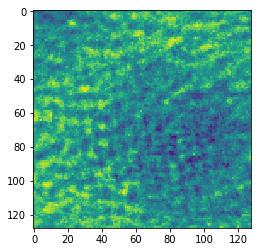

In [75]:
plt.imshow(data[0,:].reshape((128,128)))
print(data.shape)

In [79]:
j = 0
for fname in glob.glob(path2):
    #files = io.imread_collection(fname,True)
    im = np.array(imread(fname,flatten=True))
    if j == 0:
        data2 = np.reshape(im,(1,-1))     
    else:
        data2 = np.append(data2,np.reshape(im,(1,-1)),axis = 0)
    j = j+1  

In [97]:
total_data = np.concatenate((data,data2),axis = 0)

In [98]:
#data = np.empty([16384,length1])
target = np.ones([(length1-1)*6,1])
#data2 = np.empty([16384,length2])
target2 = np.zeros([(length2-1),1])
print(target2.shape)
print(target.shape)


(1504, 1)
(210, 1)


In [90]:
total_data.shape

(1714, 16384)

In [100]:
total_targets = np.concatenate((target,target2),axis =0)

In [101]:
total_targets.shape

(1714, 1)

In [102]:
np.save('ttldata_nnptl_tf',total_data)
np.save('ttltargets_nnptl_tf',total_targets)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [104]:
data_train, data_test, target_train, target_test = train_test_split(total_data, total_targets, test_size=0.25, random_state=42)

In [105]:
clf = svm.SVC(probability=True)
clf.fit(data_train, np.ravel(target_train))  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
prediticions = clf.predict(data_test)

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(target_test,prediticions)

array([[385,   0],
       [ 44,   0]])

In [109]:
clf.score(data_test, target_test)

0.89743589743589747

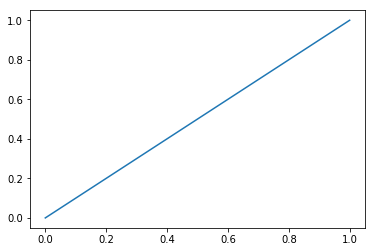

In [110]:
from sklearn.metrics import roc_curve
probs = clf.predict_proba(data_test)
fpr, tpr, thresholds = roc_curve(target_test, probs[:, 1])
plt.plot(fpr, tpr)